# Анализ социально-экономических факторов на уровень счастья и удовлетворенности жизнью в странах Европы

## **1. Сбор данных**

Описание признаков: [ссылка](https://docs.google.com/document/d/16r0fiIdUSfEgPYzUKSXar4MYbYAaMIZl/edit)

Датасет в формате csv: [ссылка](https://drive.google.com/file/d/1ZFxt4HygAkduFb7HVVI3ZcIyf51oIXCA/view?usp=share_link)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
# Получение информации о признаках для обработки 
df_ = df.iloc[:, 1:11]  
print(df_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   idno     40156 non-null  int64 
 1   agea     40156 non-null  int64 
 2   rlgdgr   40156 non-null  int64 
 3   polintr  40156 non-null  int64 
 4   sclmeet  40156 non-null  int64 
 5   happy    40156 non-null  int64 
 6   cntry    40156 non-null  object
 7   netustm  40156 non-null  int64 
 8   nwspol   40156 non-null  int64 
 9   pplfair  40156 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.1+ MB
None


In [3]:
# В признаках присутствуют значения Refusal, Don't know, No answer, Not applicable, заменим их на NaN
# Создадим словарь в котором определим, какие значения в каждом из признаков нужно заменить 
values_to_replace = {
    'idno': [None], 
    'agea': [999],
    'rlgdgr': [77, 88, 99],
    'polintr': [7, 8, 9],
    'sclmeet': [77, 88, 99],
    'happy': [77, 88, 99],
    'cntry': [None],
    'netustm': [6666, 7777, 8888, 9999],
    'nwspol': [7777, 8888, 9999],
    'pplfair': [77, 88, 99],
    }


In [4]:
#Заменим указанные значения на NaN 
for features, values in values_to_replace.items():
        df[features] = df[features].replace(values, np.nan)


In [5]:
# Подсчитаем количество пропущенных значений NaN и процент пропущенных значений
missing_counts = {features: df[features].isnull().sum() for features in values_to_replace.keys() if features in df.columns}
total_count = len(df)

print("Количество и процент пропущенных значений в обработанных признаках:")
for features, count in missing_counts.items():
    percentage = (count / total_count) * 100 
    print(f"{features}: {count} ({percentage:.2f}%)")

Количество и процент пропущенных значений в обработанных признаках:
idno: 0 (0.00%)
agea: 270 (0.67%)
rlgdgr: 261 (0.65%)
polintr: 56 (0.14%)
sclmeet: 75 (0.19%)
happy: 132 (0.33%)
cntry: 0 (0.00%)
netustm: 8758 (21.81%)
nwspol: 477 (1.19%)
pplfair: 209 (0.52%)


In [8]:
# Проверка типов данных для столбцов с 1 по 10
print(df.iloc[:, 1:11].dtypes)
# Проверка уникальных значений
for column in df.iloc[:, 1:11].columns:
    print(f"Уникальные значения в {column}: {df[column].unique()}")

idno         int64
agea       float64
rlgdgr     float64
polintr    float64
sclmeet    float64
happy      float64
cntry       object
netustm    float64
nwspol     float64
pplfair    float64
dtype: object
Уникальные значения в idno: [50014 50030 50057 ... 86228 86330 86453]
Уникальные значения в agea: [65. 21. 53. 78. 64. 59. 77. 69. 52. 75. 44. 49. 63. 76. 30. 67. 41. 82.
 26. 42. 85. 72. 31. 47. 50. 60. 43. 35. 36. 46. 81. 57. 38. 58. 79. 25.
 34. 74. 28. 16. 71. 20. 80. 51. 87. 61. 89. 68. 24. 32. 45. 33. 27. 73.
 62. 90. 70. 18. 83. 86. 39. 48. 54. 23. 55. 17. 29. 56. 19. 66. 40. 84.
 22. 88. 37. 15. nan]
Уникальные значения в rlgdgr: [ 5.  0.  8.  6.  1.  3. 10.  9.  7.  4.  2. nan]
Уникальные значения в polintr: [ 1.  2.  3.  4. nan]
Уникальные значения в sclmeet: [ 4.  7.  6.  5.  3.  2.  1. nan]
Уникальные значения в happy: [ 8.  9.  7.  5. 10.  6.  3.  4.  0.  1.  2. nan]
Уникальные значения в cntry: ['AT' 'BE' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GB' 'GR' 'HR' 'HU' 'IE' 'IS'
 'IT' '

In [30]:
# Определение выбросов числовых переменных
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
    
for column in df.iloc[:, 1:11].select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(df[column])
    print(f"Выбросы в {column}: {outliers}")

Выбросы в idno: Series([], Name: idno, dtype: int64)
Выбросы в agea: Series([], Name: agea, dtype: float64)
Выбросы в rlgdgr: Series([], Name: rlgdgr, dtype: float64)
Выбросы в polintr: Series([], Name: polintr, dtype: float64)
Выбросы в sclmeet: Series([], Name: sclmeet, dtype: float64)
Выбросы в happy: 55       3.0
147      0.0
204      1.0
212      3.0
218      3.0
        ... 
40095    3.0
40111    3.0
40116    2.0
40126    3.0
40133    3.0
Name: happy, Length: 1418, dtype: float64
Выбросы в netustm: 18       600.0
81       720.0
99       930.0
127      600.0
151      720.0
         ...  
39578    720.0
39714    710.0
39772    600.0
39967    600.0
40137    660.0
Name: netustm, Length: 2609, dtype: float64
Выбросы в nwspol: 25       240.0
110      300.0
158      240.0
430      240.0
456      300.0
         ...  
40106    672.0
40108    290.0
40114    225.0
40116    230.0
40140    240.0
Name: nwspol, Length: 2973, dtype: float64
Выбросы в pplfair: Series([], Name: pplfair, dtype: flo

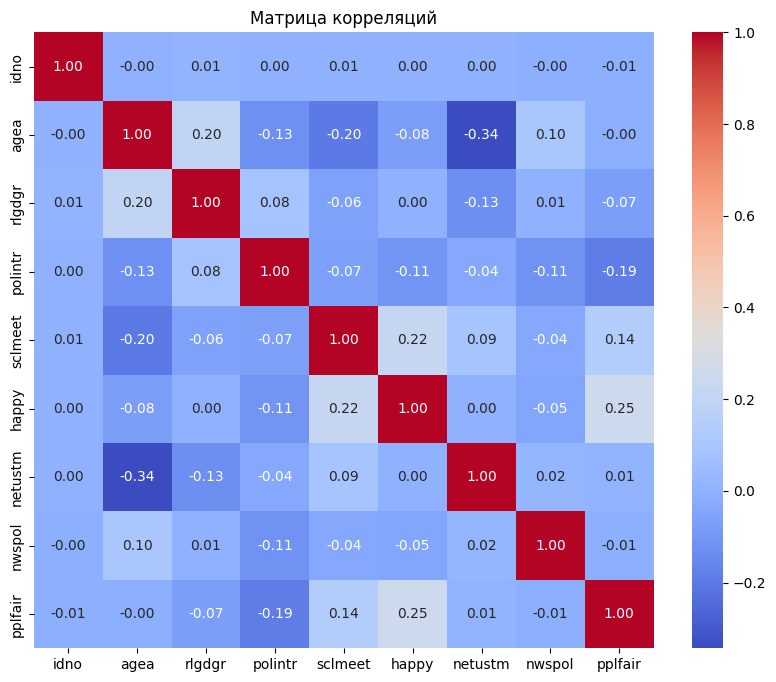

In [28]:
# Выбор только числовых столбцов
numeric_df = df.iloc[:, 1:11].select_dtypes(include=[np.number])
# Вычисление матрицы корреляций
correlation_matrix = numeric_df.corr()
# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))  # Установка размера фигуры
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()


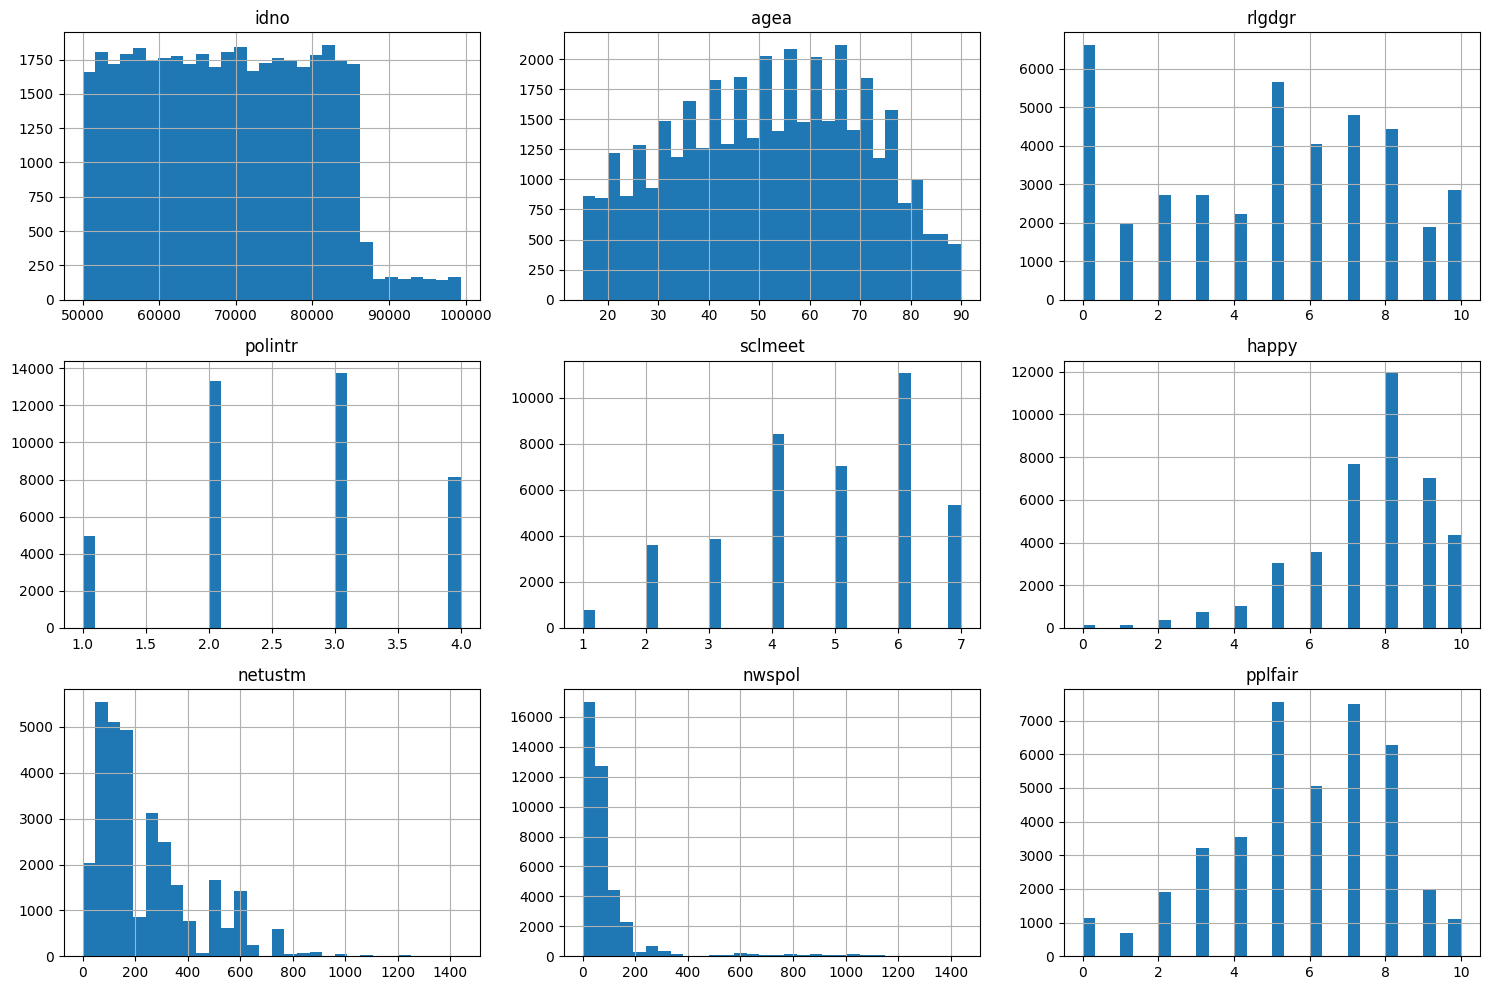

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы для числовых переменных
df.iloc[:, 1:11].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

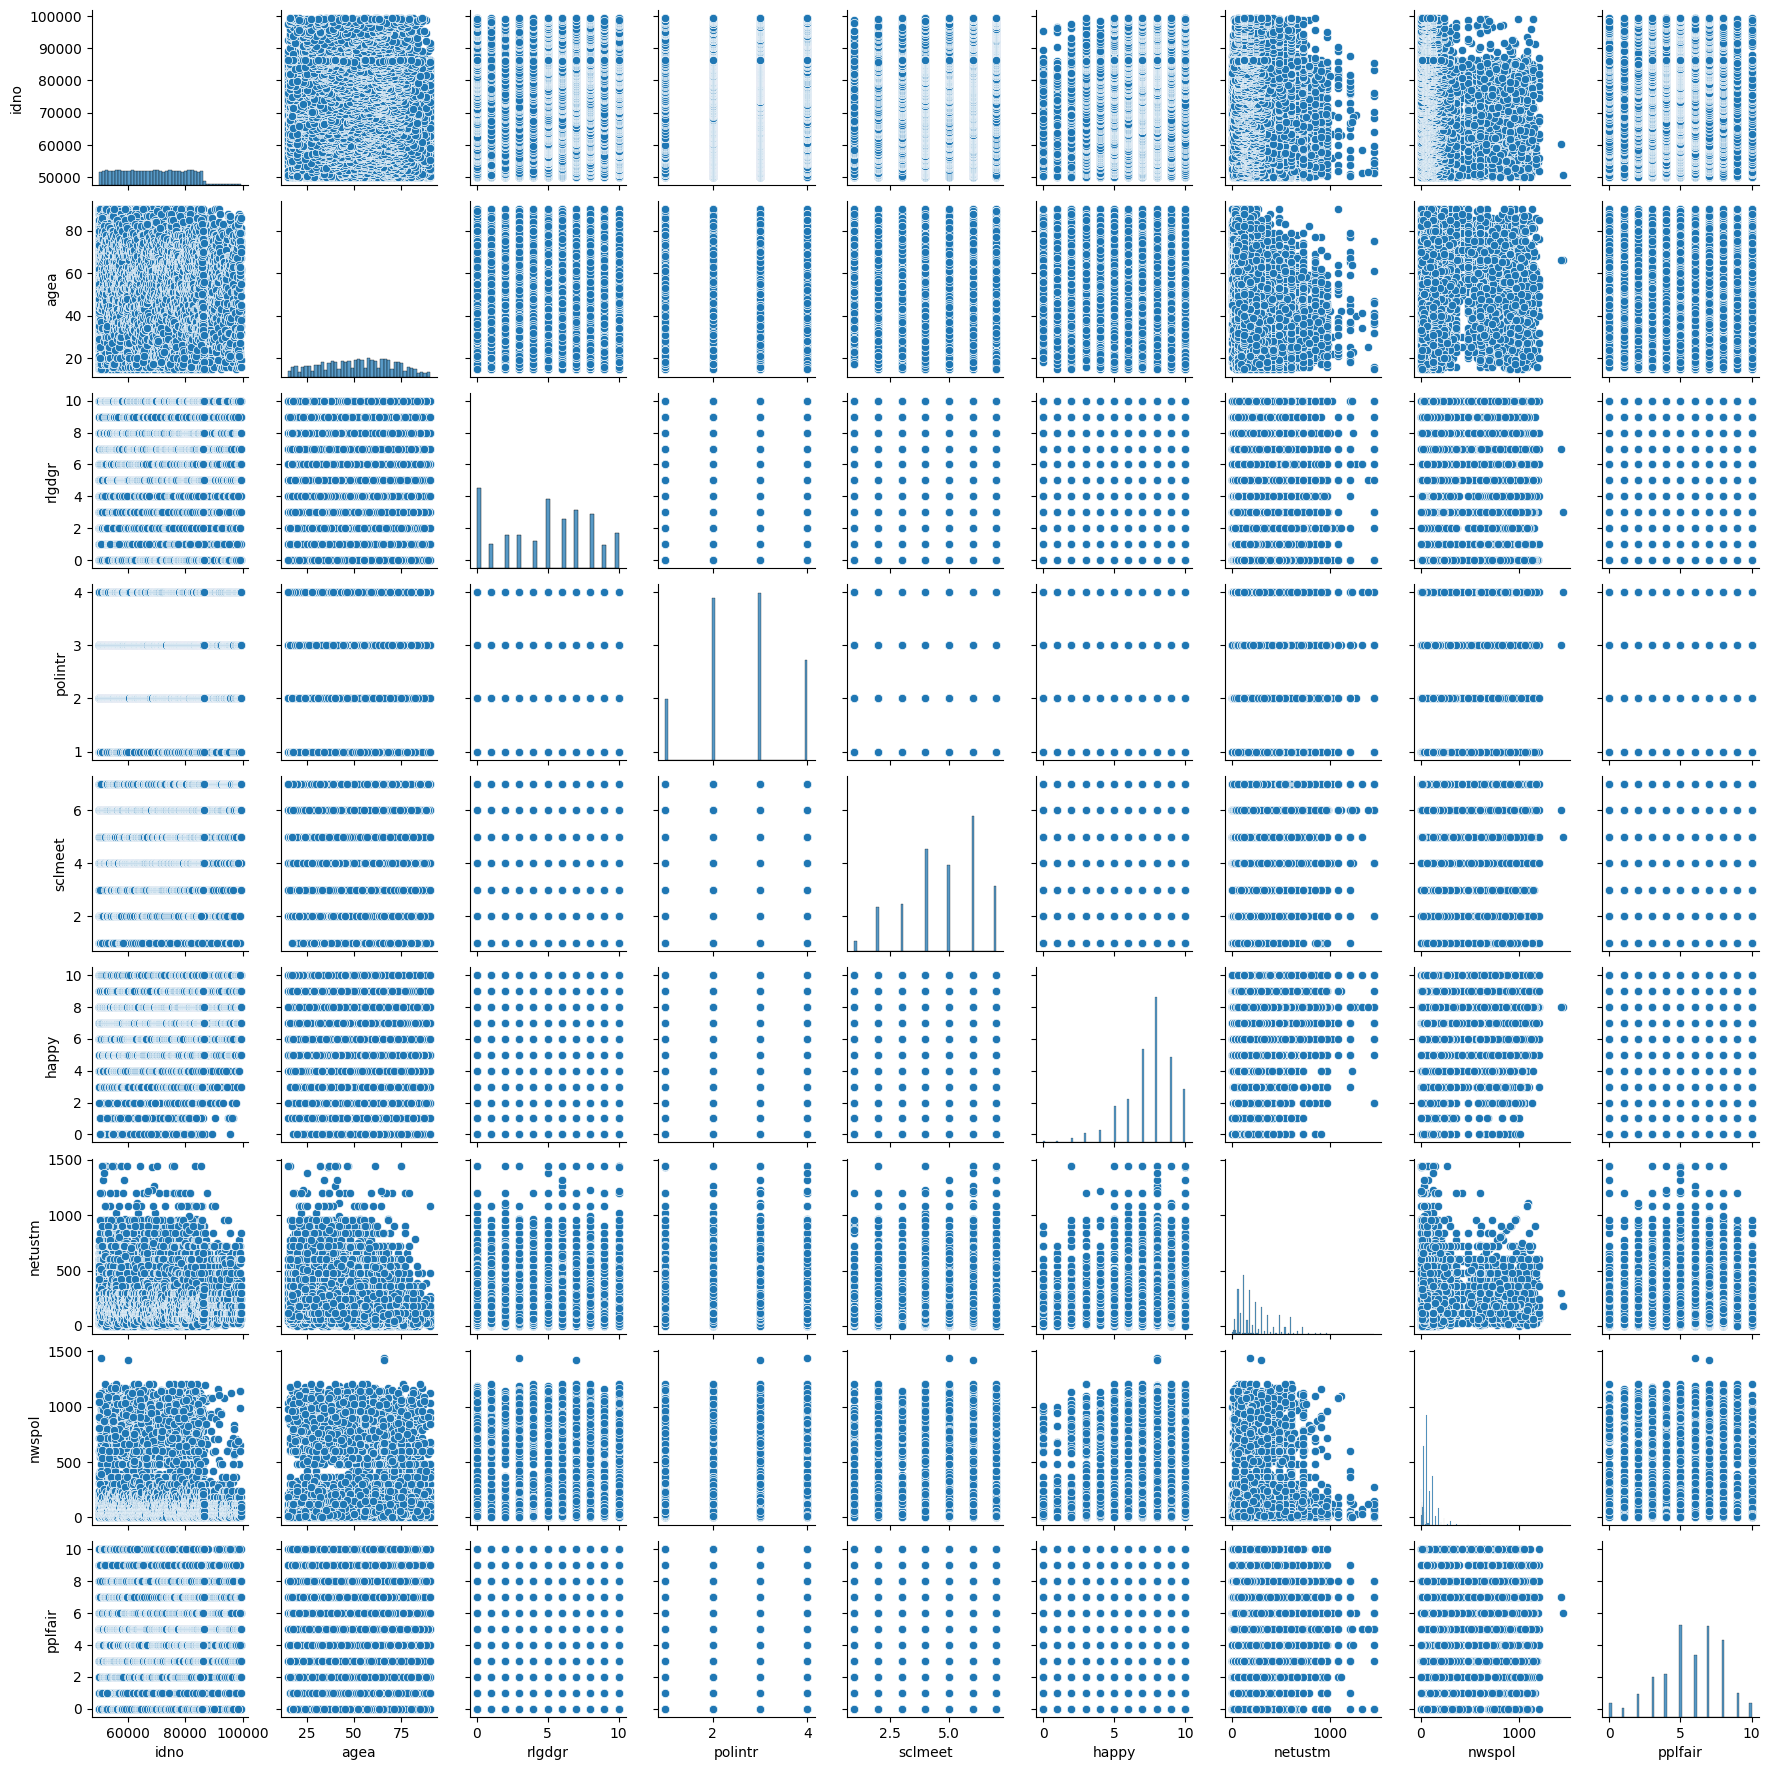

In [ ]:
# Попарные связи для числовых переменных
sns.pairplot(df.iloc[:, 1:11], height=2)  
plt.show()

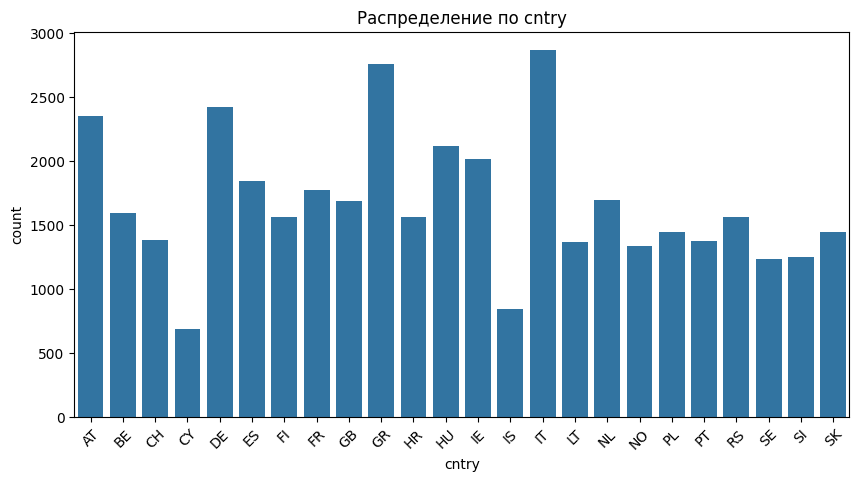

In [20]:
# Столбчатые диаграммы для категориальных переменных с 1 по 11
categorical_columns = df.iloc[:, 1:11].select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Распределение по {column}')
    plt.xticks(rotation=45)
    plt.show()